<br>

#### 1. 단어의 검색 결과 출력하기
- 다음 사전 (https://alldic.daum.net) 에 ‘happiness’ 단어를 검색하였을 때 출력 되는 화면에서 단어와 단어의 의미를 출력한다

In [1]:
#!pip install beautifulsoup4==4.7.1

[Web scraping basic]

 0. URL 분석 (패턴 존재 여부, query 종류) ex. https://alldic.daum.net/search.do?q=happiness
 1. URL 구성 (str) <- 추후 자동화 고려
 2. HTTP Response 얻기 : urlopen(URL) or request.get(URL).content
 3. HTML 얻기 (-> soup) : BeautifulSoup(HTTP Response, 'html.parser')
 4. Tag 꺼내기 : soup.find or soup.find_all (<- 태그 이름, Attr 이름, Attr 값 지정)
    -> find : 1개의 tag (조건이 동일한 tag가 여러개일 경우에는 첫번째 tag)
    -> find_all : 여러개의 tag를 찾아서 ResultSet(==list) -> for문으로 tag 꺼내 5번 항목 진행
 5. Tag로부터 텍스트 혹은 Attribute values 꺼내기 : Tag.get_text() or Tag.attrs


In [1]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen 

In [2]:
# 검색하고 싶은 단어 입력하기
word = 'happiness'

# 불러오려는 url 입력하기 
# 디폴트 url에 string 타입의 word 변수를 합쳐서 url 변수 생성
url = 'https://alldic.daum.net/search.do?q=' + word

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)   # urlopen(url).read().decode('utf-8')
print(web)

# requests.get # 범용성 있게 불러옴
# <http.client.HTTPResponse object at 0x0000013C6FD95940>

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
web_page = BeautifulSoup(web, 'html.parser')

print(web_page)


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>happiness – 다음 어학사전</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="noindex, nofollow" name="robots"/>
<meta content="http://t1.daumcdn.net/thumb/P270x270/?fname=http%3A%2F%2Ft1.daumcdn.net%2Flanguage%2Fcommon_icon%2F557565CB040E530001" property="og:image">
<meta content="website" property="og:type"/>
<meta content="Daum 사전" property="og:site_name"/>
<meta content="1.행복 2.만족 3.기쁨 4.행운 " property="og:description"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="Daum 사전" name="twitter:title"/>
<meta content="" name="twitter:site"/>
<meta content="" name="twitter:creator"/>
<meta content="1.행복 2.만족 3.기쁨 4.행운 " name="twitter:description"/>
<meta content="http://t1.daumcdn.net/thumb/P270x270/?fname=http%3A%2F%2Ft1.daumcdn.net%2Flanguage%2Fcommon_icon%2F557565CB040E530001" name="twitter:image"/>
<meta content="dic.daum.ne

#### Parser 들의 장단점
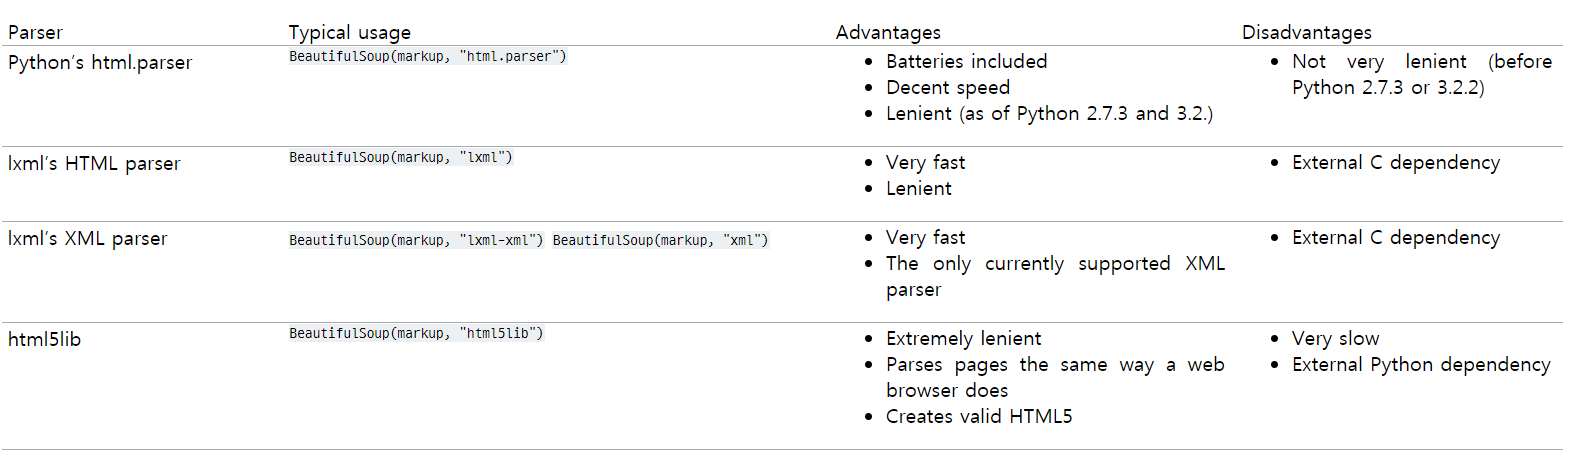

**Scraping에서 Parsing이란?**
- HTML이나 XML, JavaScript 등으로 쓰여진 소스들을 각 요소별로 나누는 것
- 이 때, 이러한 parsing을 진행해주는 것을 parser라고 부른다.

In [ ]:
# happyniess라는 단어는 <span class="txt_emph1">happiness</span>

In [8]:
# 찾는 단어 (대상이 하나일 때)

box1 = web_page.find('span', {'class': 'txt_emph1'}) # 찾다
print(box1)
 
# print(box1.get_text) # 태그를 걷어내고 내부의 텍스트만 꺼내고 싶을 때 
web_page.find('span', {'class': 'txt_emph1'}).get_text()



<span class="txt_emph1">happiness</span>


'happiness'

In [20]:
#res=web_page.find_all('a',{'class':'link_menu'})[1].get_text()

res=web_page.find_all('a',{'class':'link_menu'})[1] # 결과물은 ResultSet Object이다. 리스트가 아니기 때문에 get_text함수가 적용되지 않는다.
res.attrs # 이 결과는 dictionary이다.

# find_all은 for문을 사용해야 한다.

print(res['href'])


http://wordbook.daum.net/index.do?dic_type=endic


### web_page.find('태그 이름', 'attribute 이름을 딕셔너리로') 
 - 하나의 tag만 찾는 명령어이고, 맞는 패턴을 찾으면 그 중에 맨 앞에 것을 반환한다.
 - Ex) web_page.find('span',{'class:'txt_emph1'})


### web_page.find_all('태그 이름', '') - tag를 모두 찾는 명령어


In [5]:
# 단어의 뜻 (대상이 여러개일 때)

box2 = web_page.find_all('span', {'class': 'txt_search'}) # 모두 찾다

for tag in box2:
    #print(tag,'\n')
    print(tag.get_text())

행복
만족
기쁨
행운
행복을 가져다 주다
순간적인 행복
행복을 추구하다
state of well-being characterized by emotions ranging from contentment to intense joy
the right to try to find happiness
해피니스. 행복


In [31]:
# 단어와 단어의 뜻 출력하기

print(box1.get_text()) # get_ + Tab!
print()

for defintion in web_page.find_all('span', {'class': 'txt_search'}):
    print(defintion.get_text().strip()) # 앞부분의 공백을 지워주기 위해 strip() 적용

happiness

행복
만족
기쁨
행운
행복을 가져다 주다
순간적인 행복
행복을 추구하다
state of well-being characterized by emotions ranging from contentment to intense joy
the right to try to find happiness
해피니스. 행복


<br>

#### 크롬 확장프로그램 Pesticide 활용하기 @ https://goo.gl/iMhdPU 
- div 구획을 알려줌
- 크롤링을 위한 class & id 검출에 활용
- 설치 후 크롬에서 icon을 클릭 
- **Ctrl 키를 누른 상태에서 Hover 시 class & id 정보를 보여줌**

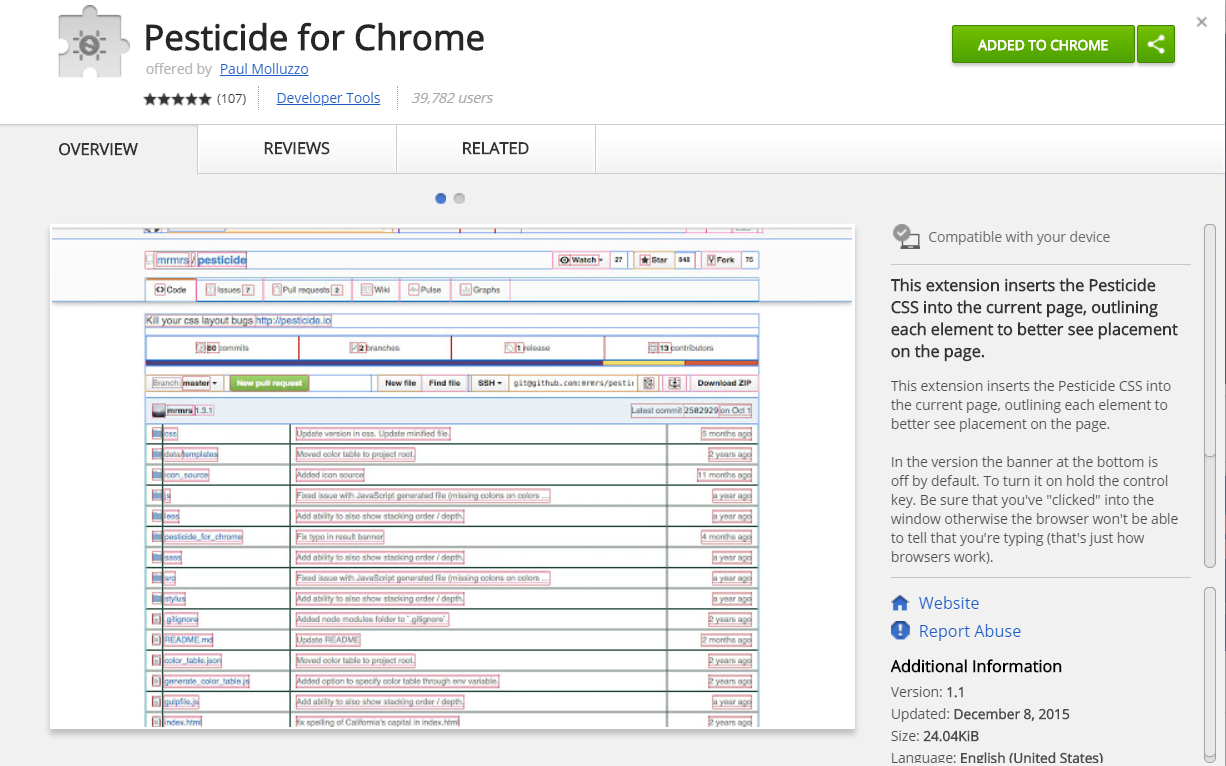

<br>
<br>

#### 2. 영화 정보 출력하기
- IMDb 사이트에서 영화 Guardians of the Galaxy 대한 제목(title)과 감독(director)을 출력한다

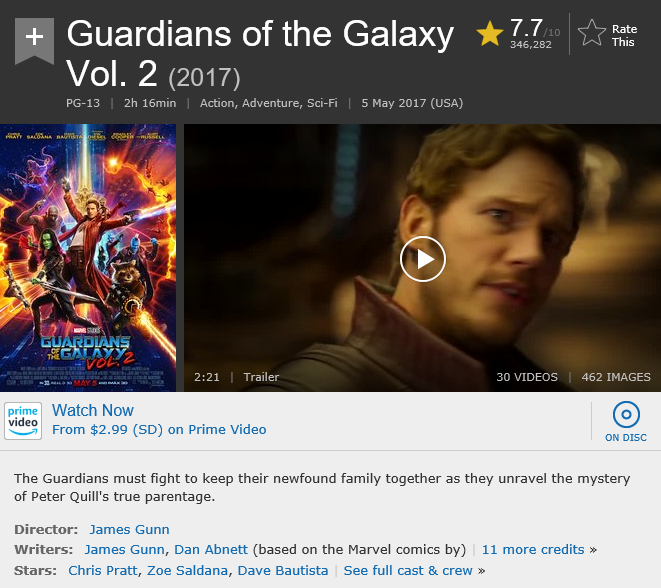

In [6]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

In [7]:
# 불러오려는 url 입력하기 (IMDb - Guardians of the Galaxy Vol. 2 (2017) )
url = 'http://www.imdb.com/title/tt3896198/?ref_=nv_sr_6'

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
web_page = BeautifulSoup(web, 'html.parser')

In [8]:
# 영화 제목을 출력한다

title = web_page.find('h1')

print('Movie Title:')
print(title.get_text())

Movie Title:
Guardians of the Galaxy Vol. 2 (2017) 


In [9]:
# 영화 요약을 출력한다

summary = web_page.find('div', {'class':'summary_text'})

print('Movie Summary:')
print(summary.get_text().strip())

Movie Summary:
The Guardians struggle to keep together as a team while dealing with their personal family issues, notably Star-Lord's encounter with his father the ambitious celestial being Ego.


In [10]:
# 감독 이름을 출력한다 (바깥의 box를 먼저 catch 후, 그 안의 tag를 catch!)

director = web_page.find('div', {'class': 'credit_summary_item'}).find('a')

print('Director:')
print(director.get_text().strip())

# select -> find
# select_all -> find_all


Director:
James Gunn


<br>
<br>

#### 3. 영화 리뷰를 출력하고 파일에 저장 하기
- 영화 Guardians of the Galaxy Vol. 2 리뷰 내용을 출력해 보자

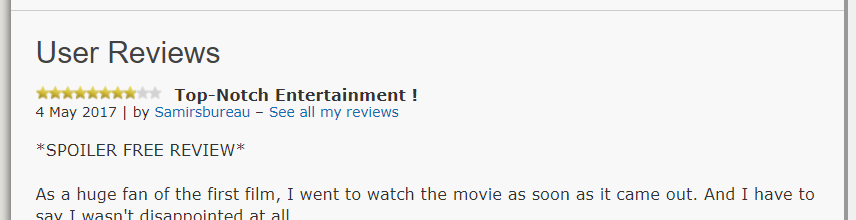

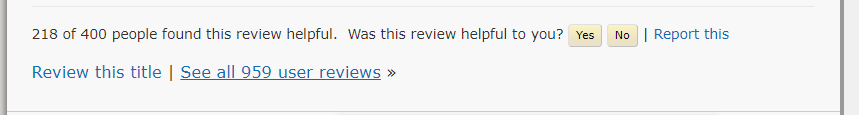

In [50]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [51]:
# 불러오려는 url 입력하기
url = 'http://www.imdb.com/title/tt3896198/reviews?ref_=tt_urv'

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
source = BeautifulSoup(web, 'html.parser')

In [53]:
# 리뷰 데이터를 출력하고 파일로 저장한다
reviews = source.find_all('div', {'class': 'content'})

with open('moviereview.txt','w', encoding = "utf-8") as f:
    for review in reviews:
        print(review.get_text())
        f.write(review.get_text())


Despite being a huge comic book nerd I was not familiar with the Guardians before the first movie came out. I did some googling and upon learning about this sci-fi superhero team consisting of a talking raccoon and tree man I was hardly impressed.I finally got round to watching the first film and was blown away. It had a remarkable charm that even the other Marvel titles didn't have. It was filled with great humour, memorable moments and fit into the Marvel Universe long running story perfectly.Because of this I pumped by expectations up high for the sequel to a degree where it was almost guaranteed to fail yet somehow, someway it didn't.Not only did it meet my expectations but it exceeded them, GotG2 is amazing.Full of the same five star humour, being a visual treat and once again with an excellent soundtrack the film gripped me from the outset and delivered that charm all over again.This time including several industry veterans including Kurt Russell (Who has been on great form sinc

<br>
<br>

#### 4. 신문 기사 출력하고 저장하기
- 시애틀의 대표적인 신문 Seattle Times에서 글을 불러와 파일로 저장하기

In [54]:
# 불러오려는 url 입력하기
url = 'https://www.seattletimes.com/business/real-estate/zillows-zestimate-overvalued-a-washington-home-by-700-percent-in-a-case-of-algorithms-gone-wrong/'

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
source = BeautifulSoup(web, 'html.parser')

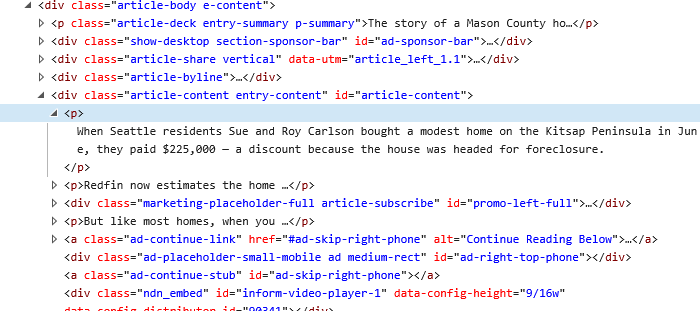

In [60]:
# Settle Times에 기사를 불러온다
with open('seattletimes.txt','w', encoding = 'utf-8') as f:
    
    times = source.find('div',{'id': 'article-content'}) # 본문에 해당하는 
    #times = source.find('section',{'id': 'content'}) # 본문에 해당하는 
    
    article = times.find_all('p') # <p>tag를 꺼내라
    
    # article = source.find('div',{'class': 'article-body e-content'}).find_all('p')
    
    for content in article:
        print(content.get_text())
        f.write(content.get_text() + '\n')

When Seattle residents Sue and Roy Carlson bought a modest home on the Kitsap Peninsula in June, they paid $225,000 — a discount because the house was headed for foreclosure.
Redfin now estimates the home in Belfair, southwest of Bremerton, is worth $318,000. Realtor.com’s algorithm pegs the house at $268,000. And the county assessor has valued it at $283,000.
But like most homes, when you Google its address, the first thing that shows up is its Zillow page.
And according to that Zillow page, the home is now worth $1.8 million.
There’s no waterfront access, redevelopment potential or anything else significant about the property — in fact, it needs serious work. So how could an unremarkable three-bedroom home, located in a city where Zillow says the median home costs $286,000, be worth that much?
“I don’t have a clue where they came up with this number,” said Sue Carlson, 70. “It’s not worth anywhere near $1 million. They’re nuts.”
Carlson went on a mission to figure out how her home co

<br>
<br>

#### (Extra) Brunch 기사글 출력하고 저장하기
- 브런치 주간지에 실린 기사을 불러와 파일로 저장하기

In [61]:
# 불러오려는 url 입력하기
url = 'https://brunch.co.kr/@imagineer/267'

# urlopen 함수를 통해 web 변수를 생성
web = urlopen(url)

# BeautifulSoup으로 web 페이지상의 HTML 구조를 파싱
source = BeautifulSoup(web, 'html.parser')

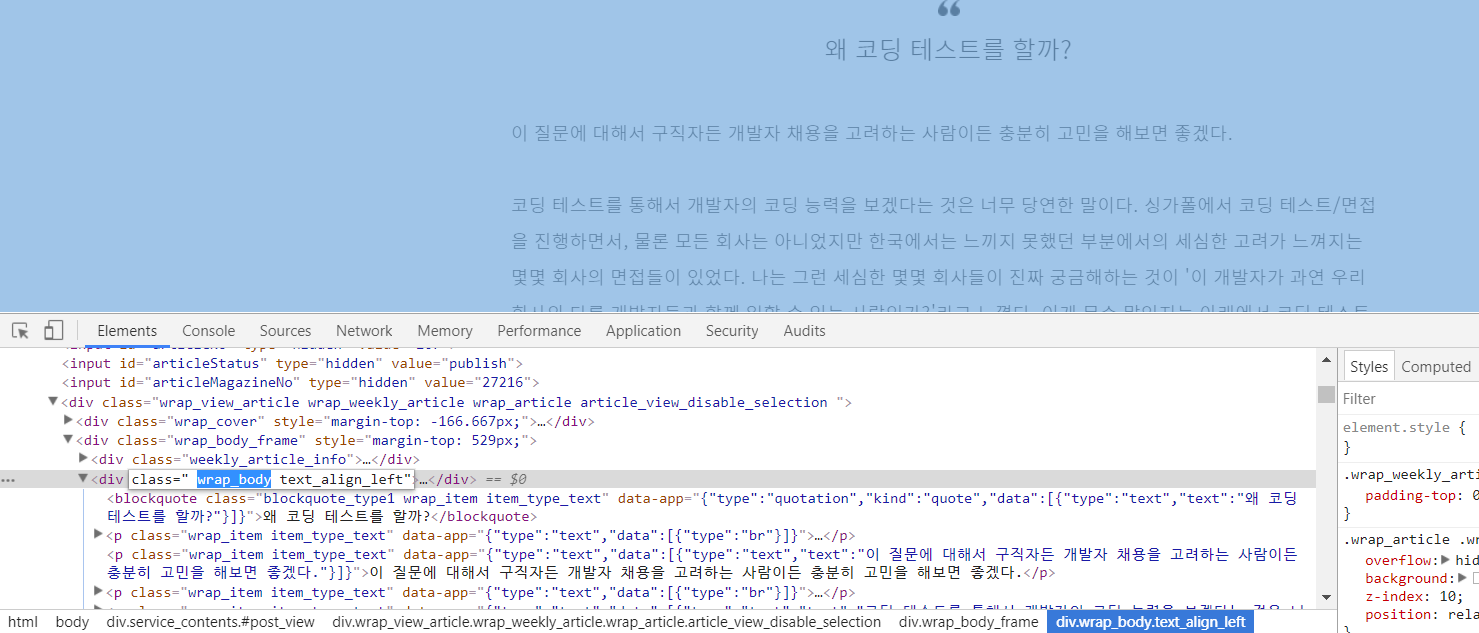

In [62]:
# 클래스에서 띄어쓰기는 여러 개의 class를 적용할 수 있다.

# Brunch 에 있는 글을 불러온다
with open('brunch.txt','w',encoding = 'utf-8') as f:
    
    all_text = source.find('div',{'class': 'wrap_body'})
    article = all_text.find_all('p')
    
    for content in article:
        print(content.get_text())
        f.write(content.get_text() + '\n')


이 질문에 대해서 구직자든 개발자 채용을 고려하는 사람이든 충분히 고민을 해보면 좋겠다.

코딩 테스트를 통해서 개발자의 코딩 능력을 보겠다는 것은 너무 당연한 말이다. 싱가폴에서 코딩 테스트/면접을 진행하면서, 물론 모든 회사는 아니었지만 한국에서는 느끼지 못했던 부분에서의 세심한 고려가 느껴지는 몇몇 회사의 면접들이 있었다. 나는 그런 세심한 몇몇 회사들이 진짜 궁금해하는 것이 '이 개발자가 과연 우리 회사의 다른 개발자들과 함께 일할 수 있는 사람인가?'라고 느꼈다. 이게 무슨 말인지는 아래에서 코딩 테스트 종류에 대한 설명을 보면서 알아보도록 하자.


내가 싱가폴에서 면접을 보면서 경험했던 코딩 테스트는 크게 3가지로 구분해볼 수 있다. '코딩 인터뷰 사이트', '온라인 실시간 면접', '과제 제출 후 오프라인 추가 면접' 이렇게인데, 아래에서 각각에 대해서 조금 더 자세하게 알아보자.

1) 코딩 인터뷰 사이트: Hackerrank, Codility

코딩 인터뷰로 유명한 위의 두 사이트에 대해 다른 글에서 소개한 적이 있으니 아래 링크를 참고하면 된다.
알고리즘 공부하지 마세요. 게임하세요! | 싱가포르에서 개발자로 구직을 하고 있다. 이미 싱가포르에 집도 계약하고 계약금도 다 치렀기 때문에 뒤로 물러설 곳도 없다. 나중에 따로 정리해서 올리겠지만, 오랜만에 이력서를 정리해서 관심이 있는 회사에 보내고, 헤드헌터들과 연락하고, 스카이프로 영어 면접을 진행하고 있다. 그중에 유명한 카드 회사에서는 코딩 테스트를 보자고 해서 코딩 테스트도 봤다. 개발
brunch.co.kr/@imagineer/250

간단하게 말하면 화이트보드 코딩 테스트를 온라인으로 옮겨놨다고 생각하면 된다. 보통은 1~3시간 정도의 주어진 시간 동안 3개 정도의 문제를 푼다. 지원자는 충분히 해당 플랫폼에서 연습하고, 자기가 테스트를 진행하고 싶은 시간에 편하게 보면 된다. 질문도 할 수 없다. 그냥 못 풀면 끝이다. 이런 사이트 링크를 받았다면, 그냥 개발자로서 기본적인 컴퓨

In [63]:
for i in range(3):
    text = 'Python' + str(i)
    print(text)

Python0
Python1
Python2


In [12]:
# Save multiple articles automatically

# @imagineer 님의 글 10개를 자동으로 가져와 저장하는 코드를 작성해보세요!
# Hint 1 : str에는 str만 더할 수 있어요!
# Hint 2 : @imagineer님 글의 URL은 몇 번부터 시작할까요?

import time

error_urls=[]

for i in range(20):
    try:
        url = 'https://brunch.co.kr/@imagineer/'+str(i)
        web = urlopen(url)
        source = BeautifulSoup(web, 'html.parser')

    # for문 안에 with를 쓰면 write를 쓰면 덮어쓰기 때문에 기존 것이 사라지기 때문에 옵션은 a를 써야 한다.

        with open('brunch_all.txt', 'a', encoding = 'utf-8') as f:

            all_text = source.find('div',{'class': 'wrap_body'})
            article = all_text.find_all('p')

            for content in article:
                #print(content.get_text())
                f.write(content.get_text() + '\n')
    except:
        print("-------------------------------------")        
        print('Index {}에서 에러가 발생'.format(i))
        print('주소는',url,'이다.')
        print("-------------------------------------\n")
        error_urls.append(url)
        #pass

    time.sleep(10) # for문 한 번 연산할 때 마다 3초씩 멈춰있으라는 명령어
    print("stop")
    # 신호를 빨리 많이 보내면 IP를 막아버리는 경우가 있다. 그래서 천천히 보내야 한다.
    
print(error_urls)


    # (Additional) 예외처리 (try & except pass 적용해보기)

-------------------------------------
Index 0에서 에러가 발생
주소는 https://brunch.co.kr/@imagineer/0 이다.
-------------------------------------

stop


KeyboardInterrupt: 